In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#convert data into numeirc

In [5]:
insurance_one_hot=pd.get_dummies(insurance)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# split dataset
x=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [14]:
tf.random.set_seed(42)

insurance_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history=insurance_model.fit(x_train,y_train,epochs=25)

Epoch 1/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13298.4424 - mae: 13298.4424
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13297.1064 - mae: 13297.1064
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13292.0078 - mae: 13292.0078
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13273.9053 - mae: 13273.9053
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13227.7568 - mae: 13227.7568
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 13136.9326 - mae: 13136.9326
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 12985.5303 - mae: 12985.5303
Epoch 8/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12758.7119 - mae: 12758.7119
Epoch 9/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12442.5918 - mae: 12442.5918
Epoch 10/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12028.4434 - mae: 12028.4434
Epoch 11/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11527.1104 - mae: 11527.1104
Epoch 12/25
34/34 ━━━━━━━━━━━━━━━━━━━

In [15]:
insurance_model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3544.1680 - mae: 3544.1680  


[3451.797119140625, 3451.797119140625]

Text(0.5, 0, 'epochs')

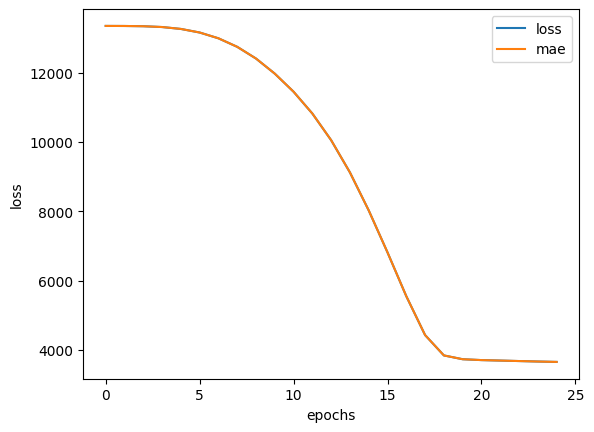

In [16]:
# plot histort (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [13]:
insurance_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,189 (90.59 KB)

 Trainable params: 7,729 (30.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,460 (60.39 KB)